# Introducing compositionality and the lambda calculus via simple mathematical language

### 10/4/2016, Kyle Rawlins, JHU, kgr@jhu.edu

**Background**: this is based on an example I use in teaching Semantics 1 to introduce the lambda calculus and compositionality.

In this notebook I sketch a basic account of the meanings of the following two sentences:

(1) Two plus two is four.
(2) Two plus two is five.

The idea is to use these two simple examples as a vehicle for understanding how compositionality is usually implemented for natural language semantics, using functions in the lambda calculus.

**Compositionality** is the idea that the meaning of a whole is constructed from the meanings of the parts.  What are the parts?

## Background: syntax

I will take it for granted that (1-2) have syntactic structure.  In particular I will assume that their structure is as follows:

(1') [[Two [plus [two]]] [is [four]]]

That is, the verb and "four" are a constituent, the subject is a constituent, and "plus" is grouped together with the right-hand "two".  All branching is binary.  These assumptions aren't trivial, so please consult your favorite syntax source to understand or disagree with them.

If you have the `nltk` package installed (http://www.nltk.org/), running the following cell will provide a graphical version of this structure.  (If you don't have NLTK installed, rerunning it will lead to an error and erase the tree.)

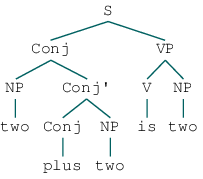

In [1]:
import nltk
nltk.Tree.fromstring("(S (Conj (NP two) (Conj' (Conj plus) (NP two))) (VP (V is) (NP two)))")

## Basics of compositionality

The first question to ask is what the individual words mean.  I have chosen the numeric example because here we have some easy starting points for answers.  The simplest answer is that the word "two" means (in some sense) the number 2.  To make sense of this, you do have to keep in mind that "2" is _not the same thing as the word you use to pronounce it_.

Some terminology: I will refer to the specific kind of meaning I am talking about as a _denotation_, and notate it as follows: [[two]] is the denotation of the word "two".

The following provides this in implemented form -- the subscripted "n"s indicate that we are dealing with numbers.

In [ ]:
%%lamb
||two|| = 2
||four|| = 4
||five|| = 5

While there is an easy answer for the numerals, the answer for the other two items ("plus", "is") is not so straightforward.  A first pass idea, however, is that [[plus]] is something to do with "+", and [[is]] is something to do with "=".  What, exactly?

First, observe that we can't simply say that [[is]] is "=".  Along the way, we want to know what the denotation of the VP "is two" is.  Setting aside some details, this hypothesis would lead us to expect that [[is two]] is something like "=2".  But this is not a well-formed expression of arithmetic! Standard arithmetic "=" requires two operators.  So we would need to either change "=" to work some other way, or change the assumptions about denotations.  Answering the question of what [[is]] is is therefore not independent of questions of meanings of larger syntactic constituents.

Accordingly, let us consider what the whole sentence should denote?  A first idea is that it should denote something like True.  That is, it is true, and is perhaps a necessary truth, so we want this computation to lead to calculating that.  A slightly more elaborate idea is that we really want something like: [[two plus two is four]] to be true iff "2+2=4" is a true expression of arithmetic.  This is what we will do, and in fact the analysis in this notebook ends up translating the English sentence into the mathematical expression "2+2=4".  This is the target of analysis, but the intermediate steps are still murky.

At this point, it is useful to consider an idea of Frege's.

> “Statements in general, just like equations or inequalities or expressions in Analysis, can be imagined to be split up into two parts; one complete in itself, and the other in need of supplementation, or “unsaturated.” ... Here too I give the name “function” to what this “unsaturated” part stands for.” 

Frege's conjecture is a direct answer to the question of what intermediate nodes should denote: they should denote functions.  It also gives interesting labels to hang on certain kinds of denotations.  According to this terminology, [[two]] (etc) are clearly _unsaturated_ -- they are internally complete.  This suggests that the other lexical entries should be functions.

**Frege's conjecture restated**: Semantic composition involves the combination of functions and arguments.

If [[is two]] is a function, what is the function?  Intuitively, it should be something like this: a function that returns true just in case whatever you hand it is equal to 2.  Luckily, such functions are easy to describe.  Before going to the actual natural language semantics, the following box presents two versions of this function stated in python.  You are probably more familiar with the `def` version; the lambda notation is a way of stating anonymous functions quickly without necessarily naming them.

In [ ]:
def istwo(x):
    return x==2

istwov2 = lambda x: x==2

In [ ]:
istwo(2)

In [ ]:
istwo(3)

In [ ]:
istwov2(2)

Here is some code that uses a function like this without ever naming it:

In [ ]:
(lambda x: x==2)(2)

Natural language semantics uses a notation much like this last python example.  In particular, functions are standardly described using a typed lambda calculus.  Here is this function in a more typcal linguistic format.  Notice the name is annotated with a complex type: `<n,t>` means that `istwo` is a function from numbers (`n`) to truth-values (`t`).

In [ ]:
%%lamb
istwo = L x_n : x <=> 2  # you need to use <=> rather than == for equality here

Applying an argument to a function of this form can be thought of mechanically as follows:
 1. The outer $\lambda$ term (e.g. $\lambda x_n$) determines a variable to replace.
 2. Find instances of that variable in the boday of the lambda expression.
 3. Replace all instances of the variable with the argument.
 
(This is simplified and there are some complicated cases that I am ignoring involving variable renaming.)

In the lambda notebook metalanguage, you can also apply arguments roughly like you would in python.  Conveniently numbers are automatically handled, so the following work.  However, more information is tracked about derivations than is usually necessary for programming languages, so you can even see the initial step where the function-argument expression is constructed but not reduced.

In [ ]:
istwo(2)

In [ ]:
istwo(2).reduce_all()

In [ ]:
istwo(2).reduce_all().derivation

_Beta reduction_ is a name for the substitition of a variable with an argument, $x$ with $2$ in this case.

## More complex functions

Using functions for [[is two]] may lead to some ideas about what words like [[is]] should themselves be.  If you are familiar with python, you may come up with something like this:

    def is(x,y):
        return x==y
        
This will not quite do for our purposes, in the same way using numeric $=$ itself won't work.  We need to apply a technique referred to as _currying_ (in CS) or _schoenfinkelization_ (in linguistics).  Any $n$-ary function can be converted to a sort of sequence of one-argument functions by this procedure.  Here is a description of the sort of function that results from currying `is`:

**Informal statement of the denotation of "is"**: [[is]] is the function that given some number $x$, returns a new function that given some number $y$ returns true iff $x = y$.

Python itself already has multiple ways to write curried functions.  Here are some examples that illustrate this; if you aren't familiar with python please feel free to skip them.

In [ ]:
def isfun(x): # I called it this because `is` is a reserved word in python.
    def isx(y):
        return x==y
    return isx
    
isfun(2)

In [ ]:
(isfun(2))(2) # note that isfun(2,2) won't work, because the function takes only one argument.

In [ ]:
def isfun(x):
    return lambda y : x==y

isfun(2)

In [ ]:
isfun(2)(2)  # this is equivalent to (isfun(2))(2), the first parenthesis are only helpful for clarity.

In [ ]:
isfun(2)(3)

A similar treatment can be given to "plus".  [[plus]] is the function that given some number, returns a function that given some other number, returns the sum of the two numbers.

In [ ]:
%%lamb
||is V|| = L x_n : L y_n : x <=> y # I've named it like this to avoid the reserved `is` in python.
||plus|| = L x_n : L y_n : x + y

To sum this all up, it is now possible to do the actual compositional steps two build the meaning of the starting sentence.  The most straightforward way to write this in the lambda notebook is to use the `*` operator to combine lexical items defined using the `||` notation as above.  For example, writing `is_V * two` computes the function that I defined directly above, the `addtwo` function: 

In [ ]:
is_V * two

In [ ]:
plus * two

Here is the calculation for the whole sentence.  I have inserted the syntactic structure by using parenthesis (there is no need to define the syntax tree directly).

In [ ]:
(two * (plus * two)) * (is_V * four)

In [ ]:
(two * (plus * two)) * (is_V * five)

Notice that, in a way, the lambda notebook calculation is _not concerned_ with whether the resulting expression is true.  It is trivial to see that one of the above two expressions is true and one is false, but what the lambda notebook is calculating is a reduction to a **meta-language** expression of some kind.  In this case, the meta-language is (apparently) a simple fragment of arithmetic.  In this sense, both of the above results are exactly what I suggested we should want.  The denotation of each of these sentence is a truth value, and what truth value it is (0 or 1) will depend on how the meta-language expression is interpreted.

It is also possible to directly check what happened in the course of such a derivation.  **FA** in the below examples means _Function Application_, i.e. the combination of a function with an argument.  Here are two useful commands for seeing derivations:

In [ ]:
((two * (plus * two)) * (is_V * four)).trace()

In [ ]:
((two * (plus * two)) * (is_V * four)).tree()

### Summary

This notebook has illustrated four main things:
 1. The basic idea of treating natural language meanings as functions and arguments, in order to understand compositionality.
 2. The use of curried functions to model incremental composition in non-trivial syntax. This allows answering questions like, what does a VP denote? (Almost all syntax is non-trivial enough to need this!)
 3. A version of the standard notation for doing this using a typed lambda calculus (with a simple mathematical underlying meta-language).
 4. How this idea can be implemented in the IPython Lambda Notebook framework.
 
The next step is to extend this idea to non-mathematicalese.  This will raise a number of further questions, one of the more pressing being, what is the metalanguage for more typical nominal expressions like "cat" or "Kyle" or "Alabama"?